# Image Encryption and Decryption

### a) Image encrypted to an Image

In [1]:
from PIL import Image
from random import randint
from matplotlib.pyplot import imshow
import numpy as np
import json
%matplotlib inline

##### Encryption part

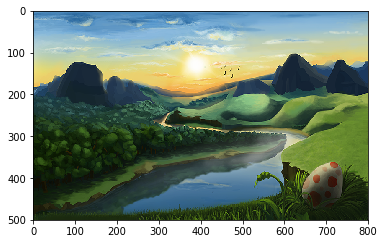

In [2]:
high = (2**8) - 1
low = 0

name = "image_to_image/test.png"
myImage = Image.open(name);
width, height = myImage.size
pixels = myImage.load()

has_alpha = len(pixels[0,0]) == 4

fill = 1
array = [[fill for x in range(width)] for y in range(height)]
for y in range(height):
    for x in range(width):
        if has_alpha:
            r, g, b, a = pixels[x,y]
        else:
            r, g, b = pixels[x,y]
        array[y][x] = r # Mapping values from range 0-255 to 0-1

imshow(np.asarray(myImage), cmap='gray')

In [3]:
# Constructing KR and KC

KR = []
KC = []

for i in range(height):
    KR.insert(i, randint(low, high))

for i in range(width):
    KC.insert(i, randint(low, high))

In [4]:
# Scrambling the rows using Kr

for i in range(height):
    alpha = 0
    for j in range(width):
        alpha = ((alpha%2) + (array[i][j] % 2)) % 2
    if(alpha == 0):
        for k in range(KR[i]):
            temp2 = array[i][width-1]
            for l in range(width-1, -1, -1):
                array[i][l] = array[i][l-1];
            array[i][0] = temp2;
    else:
        for k in range(KR[i]):
            temp2 = array[i][0]
            for l in range(width-1):
                array[i][l] = array[i][l+1];
            array[i][width-1] = temp2;

In [5]:
# Scrambling the columns using Kc

for j in range(width):
    beta = 0
    for i in range(height):
        beta = ((beta%2) + (array[i][j] % 2)) % 2
    if(beta == 0):
        for k in range(KC[j]):
            temp2 = array[height - 1][j]
            for l in range(height-1, -1, -1):
                array[l][j] = array[l-1][j];
            array[0][j] = temp2;
    else:
        for k in range(KC[j]):
            temp2 = array[0][j]
            for l in range(height-1):
                array[l][j] = array[l+1][j];
            array[height-1][j] = temp2;


In [6]:
#Performing XOR

for j in range(width):
    for i in range(height):
        if((i%2) !=0 ):
            array[i][j] = array[i][j]^KC[j]
        else:
            array[i][j] = array[i][j]^KC[width-1-j]


for i in range(height):
    for j in range(width):
        if((j%2) !=0 ):
            array[i][j] = array[i][j]^KR[i]
        else:
            array[i][j] = array[i][j]^KR[height-1-i]

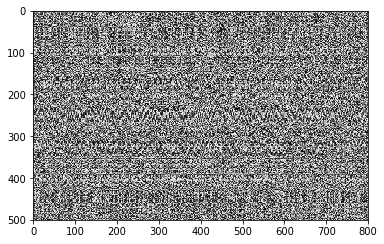

In [7]:
# Saving encrpted images and keys
array1 = np.array(array, dtype=np.uint8)
new_image = Image.fromarray(array1)
encrypted_name = name.split(".")[0] + '-encrypted.png'
new_image.save(encrypted_name)

with open("image_to_image/KR.txt", "w") as outfile:
    json.dump(KR, outfile)

with open("image_to_image/KC.txt", "w") as outfile:
    json.dump(KC, outfile)

imshow(np.asarray(new_image), cmap='gray')

##### Decryption Part

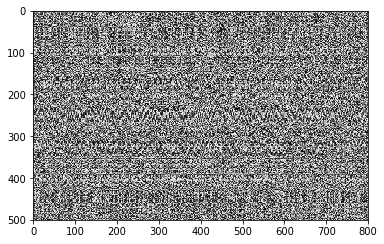

In [8]:
name = encrypted_name
myImage = Image.open(name);
width, height = myImage.size
pixels = myImage.load()

fill = 1
array = [[fill for x in range(width)] for y in range(height)]

for y in range(height):
    for x in range(width):
        array[y][x] = pixels[x,y] # Map values from range 0-255 to 0-1

with open("image_to_image/KR.txt", "r") as infile:
    KR = json.load(infile)

with open("image_to_image/KC.txt", "r") as infile:
    KC = json.load(infile)

imshow(np.asarray(myImage), cmap='gray')

In [9]:
# Recovering from XORs

for i in range(height):
    for j in range(width):
        if((j%2) != 0):
            array[i][j] = array[i][j] ^ KR[i]
        else:
            array[i][j] = array[i][j] ^ KR[height - 1 - i]

for j in range(width):
    for i in range(height):
        if((i%2) != 0):
            array[i][j] = array[i][j] ^ KC[j];
        else:
            array[i][j] = array[i][j] ^ KC[width - 1 - j]

In [10]:
# Unscrambling the colummns based on Kc

for j in range(width):
    beta = 0
    for i in range(height):
        beta = ((beta % 2) + (array[i][j] % 2)) % 2
    if(beta == 0):
        for k in range(KC[j]):
            temp2 = array[0][j]
            for l in range(height - 1):
                array[l][j] = array[l+1][j]
            array[height - 1][j] = temp2
    else:
        for k in range(KC[j]):
            temp2 = array[height - 1][j]
            for l in range(height-1, -1, -1):
                array[l][j] = array[l-1][j]
            array[0][j] = temp2

In [11]:
# Unscrambling the colummns based on Kr

for i in range(height):
    alpha = 0
    for j in range(width):
        alpha = ((alpha % 2) + (array[i][j] % 2)) % 2
    if(alpha == 0):
        for k in range(KR[i]):
            temp2 = array[i][0]
            for l in range(width - 1):
                array[i][l] = array[i][l+1]
            array[i][width - 1] = temp2
    else:
        for k in range(KR[i]):
            temp2 = array[i][width - 1]
            for l in range(width-1, -1, -1):
                array[i][l] = array[i][l-1]
            array[i][0] = temp2

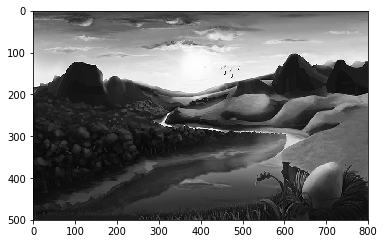

In [12]:
# Saving Decrypted image
array1 = np.array(array, dtype=np.uint8)
new_image = Image.fromarray(array1)
decrypted_name = name.split("-")[0] + '-decrypt.png' 
new_image.save(decrypted_name)

imshow(np.asarray(new_image), cmap='gray')

### b) Encrypting Audio into an Image

##### Encryption part

In [13]:
import scipy.io.wavfile as wave
import math

In [14]:
audiofile = "audio_to_image/amy.wav"
samplingRate, audioChannels = wave.read(audiofile)

left = list(audioChannels[:, 0])
right = list(audioChannels[:, 1])

length = len(left)
size = int(math.sqrt(length)) + 10

mleft = max(map(abs, left))
mright = max(map(abs, right))

def divide(a):
    return (a / float(mleft)) * 255

left = list(map(divide, left))

def divide(a):
    return (a / float(mright)) * 255

right = list(map(divide, right))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


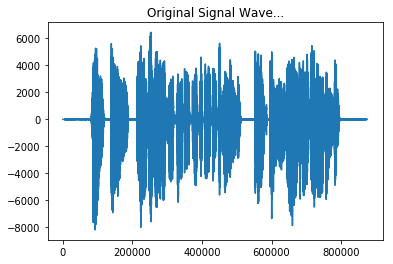

In [15]:
import matplotlib.pyplot as plt
import wave

spf = wave.open(audiofile,'r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Original Signal Wave...')
plt.plot(signal)
plt.show()

In [16]:
# Creating raw image to encrypt data
im = Image.new("RGB", (size, size), "black")

ai = 0
done = False
for i in range(size):
    if done:
        break
    for j in range(size):
        if ai >= length:
            done = True
            break
        r = int(left[ai])
        g = int(right[ai])
        b = 0
        if (r == 0 and g == 0):
            b = 0
        elif (r < 0 and g < 0):
            b = 64
        elif (r < 0 and g >= 0):
            b = 128
        elif (r >= 0 and g < 0):
            b = 192
        else:
            b = 255
        im.putpixel((i, j), (r, g, b))
        ai += 1

Image saved as audio_to_image/amy.bmp Sampling rate to retrive image:  44100


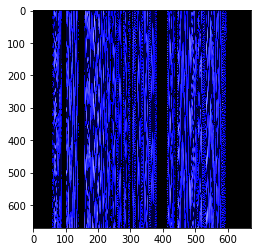

In [17]:
# Final Processing

temp = str(samplingRate)
im.putpixel((-1,-1), (int(temp[:2]),int(temp[2:4]),int(temp[4:])))

name = audiofile.split(".")[0]+".bmp"
im.save(name)

print("Image saved as "+name+" Sampling rate to retrive image: ", samplingRate)

imshow(np.asarray(im), cmap='gray')

##### Decryption part

In [18]:
import scipy.io.wavfile as wave

Enter Sampling Rate :  44100


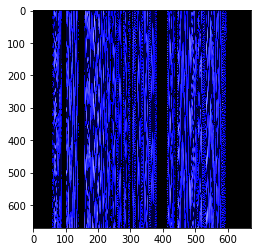

In [19]:
filename = name
im = Image.open(filename)
left = []
right = []
value = im.getpixel((-1,-1))
ans = int(str(value[0])+str(value[1])+str(value[2]))

print("Enter Sampling Rate : ", samplingRate)
samplingRate = samplingRate
if samplingRate != ans:
    raise "Error Matching the sampling rate"
imshow(np.asarray(im), cmap='gray')

In [20]:
# Restoring Audio from the image
amp = 10

for i in range(im.size[0]):
    for j in range(im.size[1]):
        pixel = im.getpixel((i, j))
        r = pixel[0]
        g = pixel[1]
        b = pixel[2]

        if (b == 64):
            r *= -1
            g *= -1

        elif (b == 128):
            r *= -1

        elif (b == 192):
            g *= -1

        r *= 4
        g *= 4

        left.append(r*amp)
        right.append(g*amp)


y = []
for i in range(len(left)):
    y.append([-1*left[i], 1*right[i]])

y = np.array(y, dtype='int16')
name = filename.split(".")[0]+"out.wav"
wave.write(name, samplingRate, y)
print("Output saved as", name)


Output saved as audio_to_image/amyout.wav


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


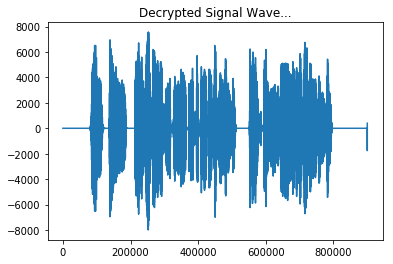

In [21]:
import wave

audiofile = name
spf = wave.open(audiofile,'r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Decrypted Signal Wave...')
plt.plot(signal)
plt.show()

### c) Encrypting text into an Image

##### Encryption Part

In [22]:
def encode_image(img, msg):

    length = len(msg)
    if img.mode != 'RGB':
        print("image mode needs to be RGB")
        return False

    encoded = img.copy()
    width, height = img.size
    index = 0
    for row in range(height):
        for col in range(width):
            r, g, b = img.getpixel((col, row))
            if index <= length:
                c = msg[index - 1]
                asc = ord(c)
            else:
                asc = r
            encoded.putpixel((col, row), (asc, g , b))
            index += 1
    return encoded

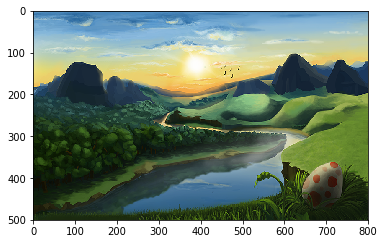

In [23]:
original_image_file = "text_to_image/test.png"
img = Image.open(original_image_file)
imshow(np.asarray(img), cmap='gray')

In [24]:
print("Enter the secret message: ")
secret_msg = input()
print("len of secret message", len(secret_msg))
img_encoded = encode_image(img, secret_msg)


encoded_image_file = original_image_file.split(".")[0] + "-"+str(len(secret_msg))+ "_enc.png"

if img_encoded:
    img_encoded.save(encoded_image_file)
    print("{} saved!".format(encoded_image_file))
else:
    print("Error encoding!")


Enter a small secret message: 
This is a small secret message to be encrypted into the image
len of secret message 61
text_to_image/test-61_enc.png saved!


##### Decryption Part

In [25]:
def decode_image(img, length):

    width, height = img.size
#     print(width, height)
    msg = ""
    index = 0
    for row in range(height):
        for col in range(width):
            try:
                r, g, b = img.getpixel((col, row))
            except ValueError:
                r, g, b, a = img.getpixel((col, row))
            if index <= length:
                msg += chr(r)
            index += 1
    return msg

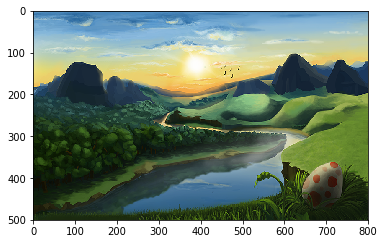

In [26]:
img = encoded_image_file
length = int(img.split("-")[-1].split("_")[0])
img2 = Image.open(img)

imshow(np.asarray(img2), cmap='gray')

In [28]:
hidden_text = decode_image(img2, length)
print("Hidden text:\n{}".format(hidden_text[1:]))

Hidden text:
This is a small secret message to be encrypted into the image


# That's all for now!